In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =  pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.shape

(400, 5)

In [4]:
df


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
from sklearn.model_selection import train_test_split
amap={"Male":1 , "Female":0}
df.replace(amap,inplace=True)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [8]:
x, y = df.drop("Purchased", axis=1), df["Purchased"]

In [9]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=1 )

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()

In [12]:
model.fit(x_train, y_train)

LogisticRegression()

In [13]:
yPred = model.predict(x_test)

In [14]:
yPred

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [15]:
from sklearn.metrics import accuracy_score 

In [16]:
print("Accuracy:", accuracy_score(yPred, y_test)*100)

Accuracy: 69.0


In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
CM = confusion_matrix

In [19]:
CM = confusion_matrix(y_test, yPred)

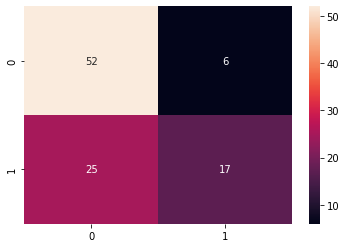

In [20]:
sns.heatmap(CM, annot=True)
plt.show()

In [21]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score,classification_report


In [22]:
print(classification_report(y_test,yPred))

              precision    recall  f1-score   support

           0       0.68      0.90      0.77        58
           1       0.74      0.40      0.52        42

    accuracy                           0.69       100
   macro avg       0.71      0.65      0.65       100
weighted avg       0.70      0.69      0.67       100

